In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-CD0198EN-SkillsNetwork/labs/data/Annual_Macroeconomic_Factors.csv'
df = pd.read_csv(path)

df.head()

,Date,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
0,1975-01-01,61.0900,67.14653,65.30488,0.98599,8.46667,5648.462,9.04712,19908
1,1976-01-01,65.5250,79.96264,69.05653,0.95022,7.71667,5952.809,8.86585,20346
2,1977-01-01,73.4350,78.82540,73.54636,1.00577,7.06667,6228.076,8.84519,20780
3,1978-01-01,83.7450,78.84679,79.15866,1.05957,6.06667,6572.819,9.64173,21497
4,1979-01-01,95.1325,85.63207,88.06755,1.10358,5.83333,6780.924,11.20365,21672


In [4]:
reduced_df = df.drop(columns='Stock_Price_Index')
reduced_df.head()

,Date,House_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
0,1975-01-01,61.0900,65.30488,0.98599,8.46667,5648.462,9.04712,19908
1,1976-01-01,65.5250,69.05653,0.95022,7.71667,5952.809,8.86585,20346
2,1977-01-01,73.4350,73.54636,1.00577,7.06667,6228.076,8.84519,20780
3,1978-01-01,83.7450,79.15866,1.05957,6.06667,6572.819,9.64173,21497
4,1979-01-01,95.1325,88.06755,1.10358,5.83333,6780.924,11.20365,21672


In [5]:
smaller_df = df[df['Unemployment_Rate'] < 9.5].copy()
print(smaller_df.shape)
print(df.shape)

(44, 9)
(47, 9)


In [6]:
print(smaller_df.size)
print(smaller_df.shape)

396
(44, 9)


In [7]:
selected_df = df[['Real_Disposable_Income', 'House_Price_Index']]
selected_df.describe()

,Real_Disposable_Income,House_Price_Index
count,47.000000,47.000000
mean,32040.936170,240.145585
std,8006.301392,120.405988
min,19908.000000,61.090000
25%,25432.500000,140.788750
50%,31712.000000,211.462500
75%,38235.000000,339.353750
max,48219.000000,523.260000


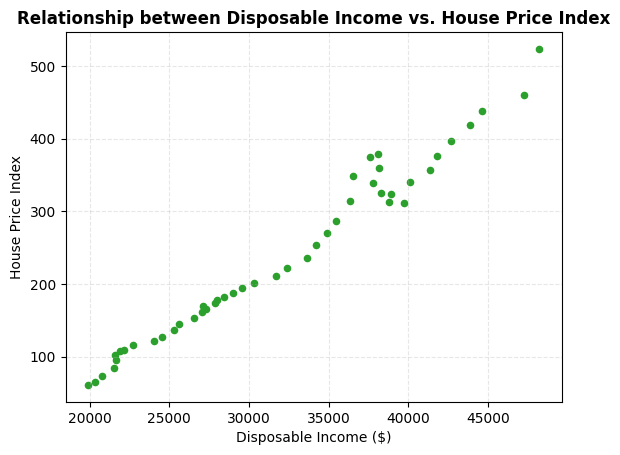

In [8]:
selected_df.plot(kind="scatter", x='Real_Disposable_Income', y='House_Price_Index', color='tab:green')

plt.title("Relationship between Disposable Income vs. House Price Index", fontsize=12, weight='bold')
plt.xlabel("Disposable Income ($)")
plt.ylabel("House Price Index")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

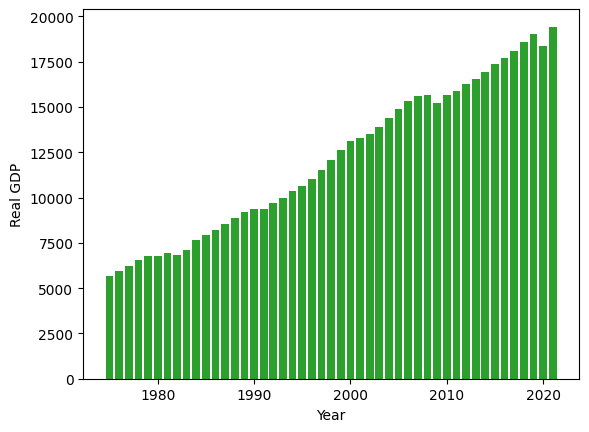

In [24]:
plt.bar(pd.DatetimeIndex(df['Date']).year, df['Real_GDP'], color='tab:green')
plt.xlabel("Year")
plt.ylabel("Real GDP")
plt.show()

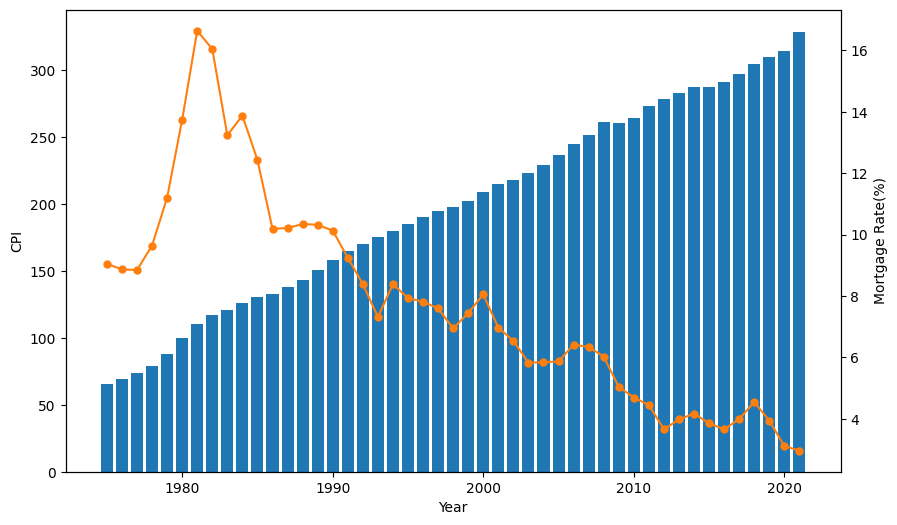

In [32]:
fig, ax1 = plt.subplots(figsize=(10,6))

x = pd.DatetimeIndex(df['Date']).year
y1 = df['Consumer_Price_Index']
y2 = df['Mortgage_Rate']

ax2 = ax1.twinx()

ax1.bar(x, y1, color='tab:blue')
ax2.plot(x, y2, color='tab:orange', marker='.', markersize=10)

ax1.set_xlabel("Year")
ax1.set_ylabel("CPI")
ax2.set_ylabel("Mortgage Rate(%)")

plt.show()

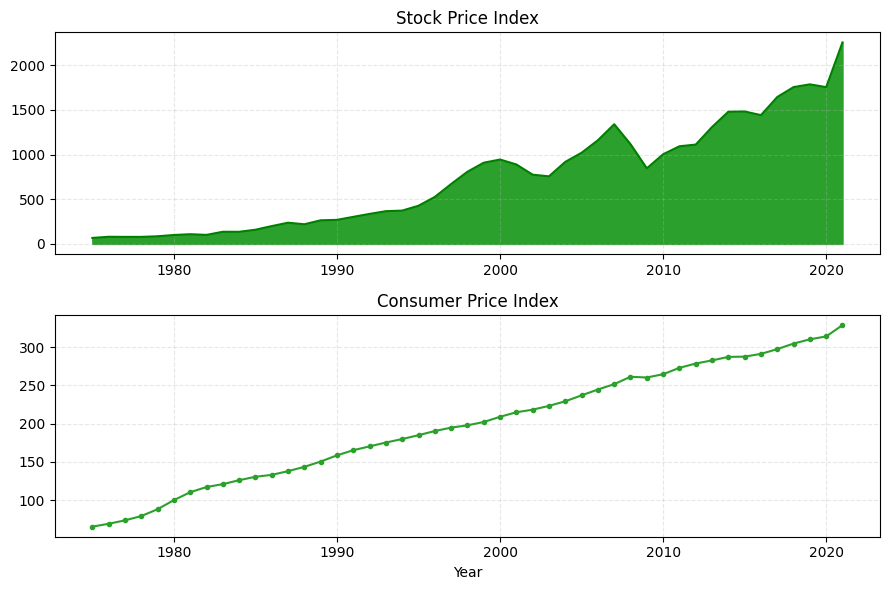

In [64]:
fig, ax = plt.subplots(2, 1, figsize=(9,6))

x = pd.DatetimeIndex(df['Date']).year
y1 = df['Stock_Price_Index']
y2 = df['Consumer_Price_Index']

ax[0].plot(x, y1, color='green')
ax[0].set_title("Stock Price Index")
ax[0].fill_between(x,y1, color='tab:green')
ax[0].grid(True, linestyle='--', alpha=0.3)

ax[1].plot(x, y2, marker='.', color='tab:green')
ax[1].set_title("Consumer Price Index")
ax[1].set_xlabel("Year")
ax[1].grid(True, linestyle='--', alpha=0.3)


plt.tight_layout()
plt.show()